## Sales Analysis

#### Import Necessary Libraries

In [251]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge 12 months of sales data into a single csv file

In [252]:
df = pd.read_csv(r"C:\Users\wiroo\Documents\Projects\Data Science\Sales Analysis\Sales Data\Sales_April_2019.csv")

from pathlib import Path

path_1 = str(Path(r"C:\Users\wiroo\Documents\Projects\Data Science\Sales Analysis\Sales Data\\"))

files = [file for file in os.listdir(path_1)]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\wiroo\Documents\Projects\Data Science\Sales Analysis\Sales Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("new_data.csv", index = False)


#### Read in updated dataframe

In [253]:
new_data = pd.read_csv("new_data.csv")

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean Up the Data

##### Drop rows of NaN

In [254]:
nan_df = new_data[new_data.isna().any(axis = 1)]

nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
new_data = new_data.dropna(how = "all")

# any = drop a row that may have one NaN
# all = drop row with all values NaN

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find "Or" and delete it

In [256]:
# There are some duplicate column header rows

or_data = new_data[new_data["Order Date"].str[0:2] == "Or"]

or_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [257]:
new_data = new_data[new_data["Order Date"].str[0:2] != "Or"]

new_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert columns to the correct type

In [258]:
new_data["Quantity Ordered"] = pd.to_numeric(new_data["Quantity Ordered"]) #Change to int

new_data["Price Each"] = pd.to_numeric(new_data["Price Each"]) #change to float

new_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Augment Data with Additional Columns

##### Add Month Column

In [259]:
new_data["Month"] = new_data["Order Date"].str[0:2]

new_data["Month"] = new_data["Month"].astype("int32")

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add Sales Column

In [260]:
new_data["Sales"] = new_data["Quantity Ordered"] * new_data["Price Each"]

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add City Column

In [261]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]


new_data["City"] = new_data["Purchase Address"].apply(lambda x: get_city(x) + "," + get_state(x))

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


#### Question 1: What was the best month for sales? How much was earned that month?

December was the best month for sales with about 4.6 million in total sales.

In [262]:
results_1 = new_data.groupby("Month").sum()

results_1

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


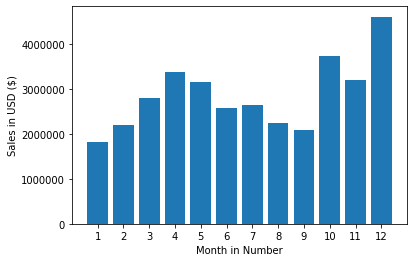

In [263]:
months = range(1,13)

plt.bar(months, results_1["Sales"])

plt.xticks(months)
plt.xlabel("Month in Number")
plt.ylabel("Sales in USD ($)")

plt.show()


#### Question 2: What city had the highest number of sales?

Sanfrancisco, CA had the highest number of sales.

In [264]:
results_2 = new_data.groupby("City").sum()

results_2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2.779908e+06,104794,2.795499e+06
"Austin,TX",11153,1.809874e+06,69829,1.819582e+06
"Boston,MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas,TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,208325,5.452571e+06
"New York City,NY",27932,4.635371e+06,175741,4.664317e+06
"Portland,ME",2750,4.471893e+05,17144,4.497583e+05
"Portland,OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco,CA",50239,8.211462e+06,315520,8.262204e+06


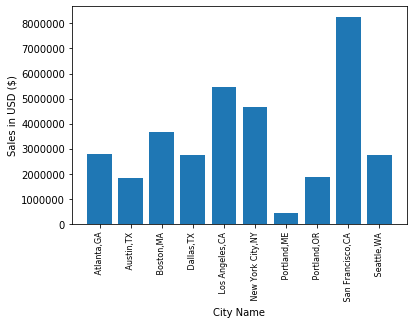

In [265]:
cities = [city for city, df in new_data.groupby("City")]

plt.bar(cities, results_2["Sales"])
plt.xticks(cities, rotation = "vertical", size =  8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

19.00 O'Clock or 7.00 pm is the time that we should display advertisements.

In [267]:
new_data["Order Date"] = pd.to_datetime(new_data["Order Date"])

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [268]:
new_data["Hour"] = new_data["Order Date"].dt.hour
new_data["Minute"] = new_data["Order Date"].dt.minute

new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9,27


In [269]:
 new_data.groupby(["Hour"])["Quantity Ordered"].count()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

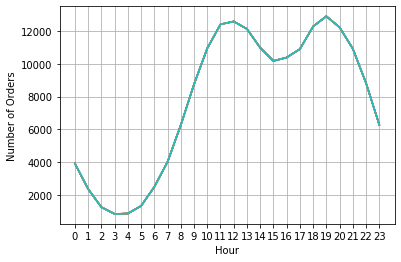

In [270]:
hours = [hour for hour, df in new_data.groupby("Hour")]

plt.plot(hours, new_data.groupby(["Hour"]).count())

plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()

plt.show()

#### Question 4: What products are most often sold together?

iPhone and Lightning Charging Cable are most often sold together. With 1005 orders

In [271]:
df = new_data[new_data["Order ID"].duplicated(keep = False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


df.head()


C:\Users\wiroo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles,CA",19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston,MA",11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [272]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [273]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it shold the most?

AAA Batteries (4-pack) were sold the most because they were only $2.99 each. Therefore, customers were willing to buy them more.

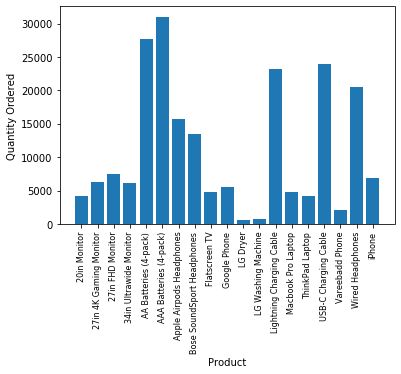

In [280]:
product_group = new_data.groupby("Product")

quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")

plt.show()

In [281]:
prices = new_data.groupby("Product").mean()["Price Each"]

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

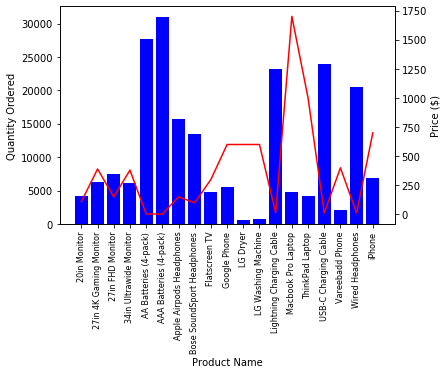

In [300]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color= "blue")
ax2.plot(products, prices, "red")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price ($)")
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

plt.show